Data for US confirmed cases and deaths can be found at the following links. Worldwide data is also available in the same repository.

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

Place these files in a 'data/' folder contained in the same directory as this notebook. Ensure names are correct, and run!

The plotting cell is set up to try to fit a curve to the actual data, for each confirmed  cases and deaths. From this fit, you should be able to 


In [11]:
import urllib.request
import os

confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

confirmed_file_name = confirmed_url.split('/')[-1]
deaths_file_name = deaths_url.split('/')[-1]

download_folder = os.getcwd() + '/data/'

urllib.request.urlretrieve(confirmed_url, download_folder + confirmed_file_name)
urllib.request.urlretrieve(deaths_url, download_folder + deaths_file_name)


('/Users/ethanblagg/SynologyDrive/Documents/Projects/YT/Covid/data/time_series_covid19_deaths_US.csv',
 <http.client.HTTPMessage at 0x7f8158382350>)

In [12]:
import csv

file = download_folder + confirmed_file_name
print("Opening " + file + '\n')

# open the csv file
with open(file, newline='') as csvfile:
    covid_confirmed_us = csv.reader(csvfile, delimiter=',')
    
    # iterate through the headers file, but save it
    headers_confirmed = next(covid_confirmed_us)
    row_length = len(headers_confirmed)
    
    # get headers before first day of data (11)
    #for i, val in enumerate(headers):
    #    print("{}: {}".format(i,val))
    first_day_idx = 11                                  # index of first day in row
    num_days = row_length-first_day_idx
    confirmed_by_day = [0]*(num_days)   # list to hold daily vals
    
    
    
    # save the data to array, squashing the areas into one dimension
    for i, row in enumerate(covid_confirmed_us):
        
        # sum the data for each day    # slices in format (start:end), blank == end
        for j, num in enumerate(row[first_day_idx:]):  
            #print("{}: {}".format(j,num))
            confirmed_by_day[j] += int(num)
            

    print(confirmed_by_day)


Opening /Users/ethanblagg/SynologyDrive/Documents/Projects/YT/Covid/data/time_series_covid19_confirmed_US.csv

[1, 1, 2, 2, 5, 5, 5, 5, 5, 7, 8, 8, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 16, 16, 24, 30, 53, 73, 104, 172, 217, 336, 450, 514, 708, 1105, 1557, 2147, 2857, 2918, 4307, 6096, 8873, 14094, 19403, 25725, 33634, 43663, 53736, 65778, 83836, 101657, 121465, 140909, 161831, 188172, 213362, 243762, 275582, 308848, 337065, 366660, 396221, 429047, 461432]


In [13]:

file = download_folder + deaths_file_name
print("Opening " + file + '\n')

# open the csv file
with open(file, newline='') as csvfile:
    covid_deaths_us = csv.reader(csvfile, delimiter=',')
    
    # iterate through the headers file, but save it
    headers_deaths = next(covid_deaths_us)
    row_length_deaths = len(headers_deaths)
    
    # get headers before first day of data (11)
    #for i, val in enumerate(headers_deaths):
    #    print("{}: {}".format(i,val))
    deaths_first_day_idx = 12                                  # index of first day in row
    num_days_deaths = row_length_deaths - deaths_first_day_idx
    deaths_by_day = [0]*(num_days_deaths)   # list to hold daily vals
    
    
    
    # save the data to array, squashing the areas into one dimension
    for i, row in enumerate(covid_deaths_us):
        
        # sum the data for each day    # slices in format (start:end), blank == end
        for j, num in enumerate(row[deaths_first_day_idx:]):  
            #print("{}: {}".format(j,num))
            deaths_by_day[j] += int(num)
            

    print(deaths_by_day)



Opening /Users/ethanblagg/SynologyDrive/Documents/Projects/YT/Covid/data/time_series_covid19_deaths_US.csv

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 7, 11, 12, 14, 17, 21, 22, 28, 32, 40, 48, 52, 60, 84, 107, 143, 209, 258, 318, 427, 552, 706, 942, 1209, 1581, 2181, 2565, 3102, 4037, 4992, 6291, 7746, 9132, 10411, 10783, 12721, 14694, 16477]


[ 5.08781036e+01 -1.16648869e-01 -5.93839754e+03]


/Users/ethanblagg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


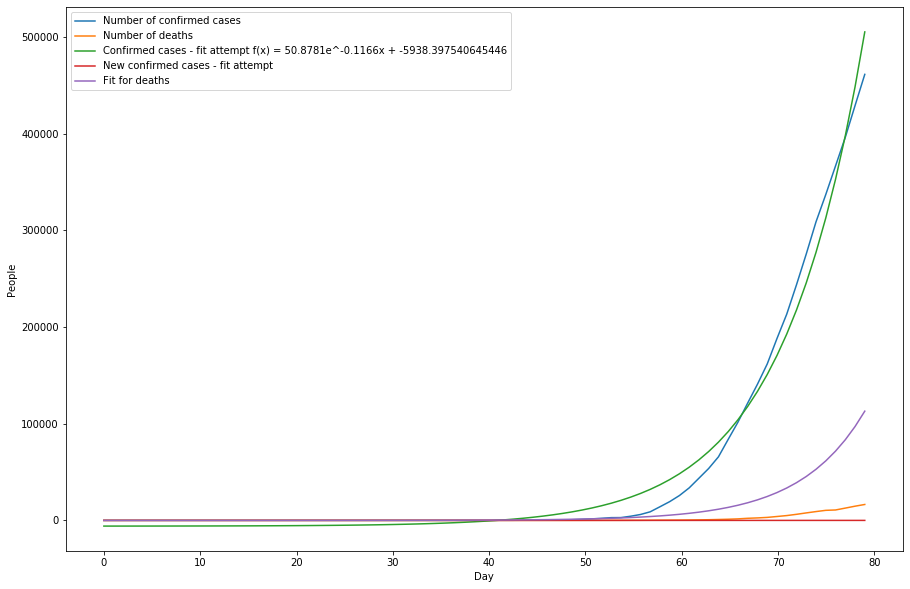

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

xc = np.linspace(0,num_days,num_days) # (start, stop, number of points)
xd = np.linspace(0,num_days_deaths,num_days_deaths)

# Attempts to fit curve to confirmed cases data
# 1
# https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
arr = np.polyfit(xc, np.log(confirmed_by_day), 1)
#A = np.exp(arr[1])
#r = arr[0]
#confirmed_fit = A * np.exp(r * (xc))

# 2
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, xc, confirmed_by_day) # fit params a,b,c
print(popt)
A = popt[0]
r = popt[1]
func_str = '{0:.4f}e^{1:.4f}x + {2}'.format(popt[0], popt[1], popt[2])
confirmed_fit = func(xc, *popt)

# 3
#A = 2
#r = 0.1385
#t0 = -10
#confirmed_fit = A * np.exp(r * (xc-t0))


# Attempt to fit curve to deaths data
B = .18
s = 0.15
x0 = t0
deaths_fit = B * np.exp(s * (xd-x0))


# Confirmed new cases per day (derivative of confirmed cases data)
confirmed_fit_new_for_day = A * np.exp(r * (xc)) * r


# plot
plt.figure(num=None, figsize=(15, 10), facecolor='w', edgecolor='k') # figure to plot in

plt.plot(xc,confirmed_by_day, label='Number of confirmed cases')
plt.plot(xd,deaths_by_day, label='Number of deaths')
plt.plot(xc,confirmed_fit, label='Confirmed cases - fit attempt f(x) = {}'.format(func_str))
plt.plot(xc,confirmed_fit_new_for_day, label='New confirmed cases - fit attempt')
plt.plot(xc,deaths_fit, label='Fit for deaths')

plt.xlabel('Day')
plt.ylabel('People')
plt.legend()

